# This is based on Example 1-3 from Elements of Chemical Reaction Engineering 6th Edition

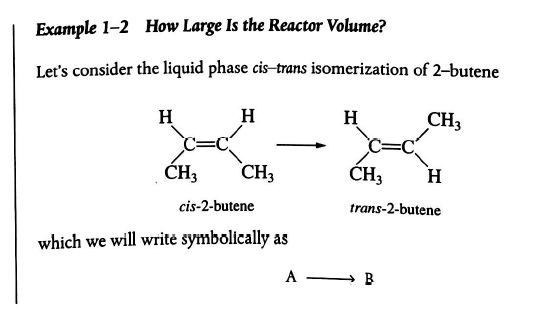

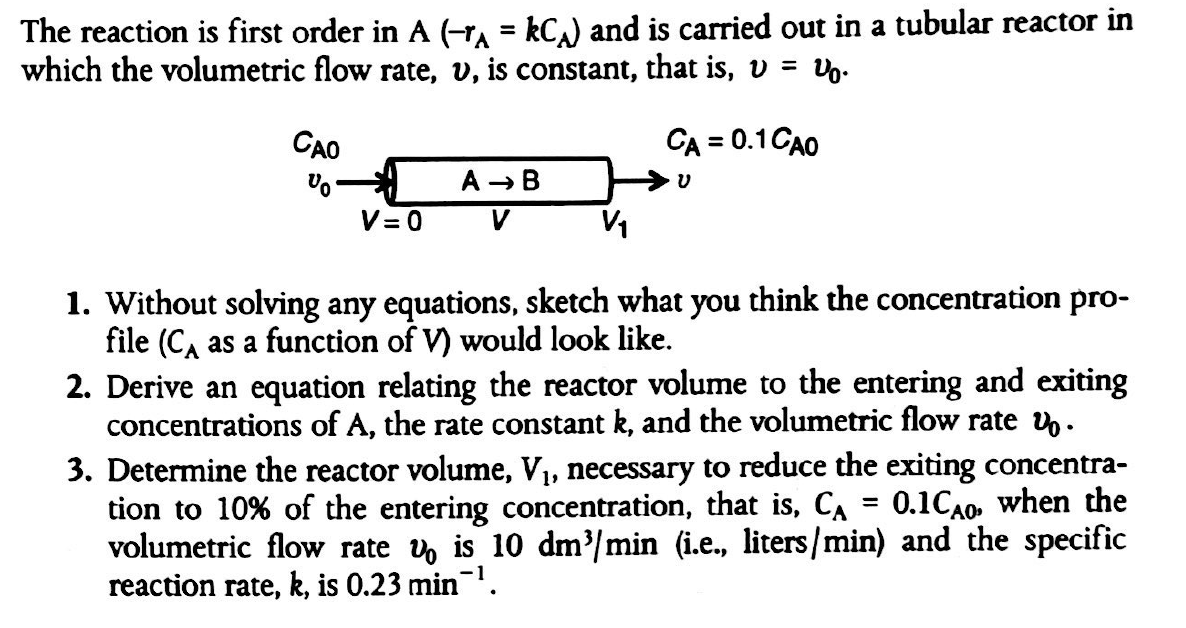

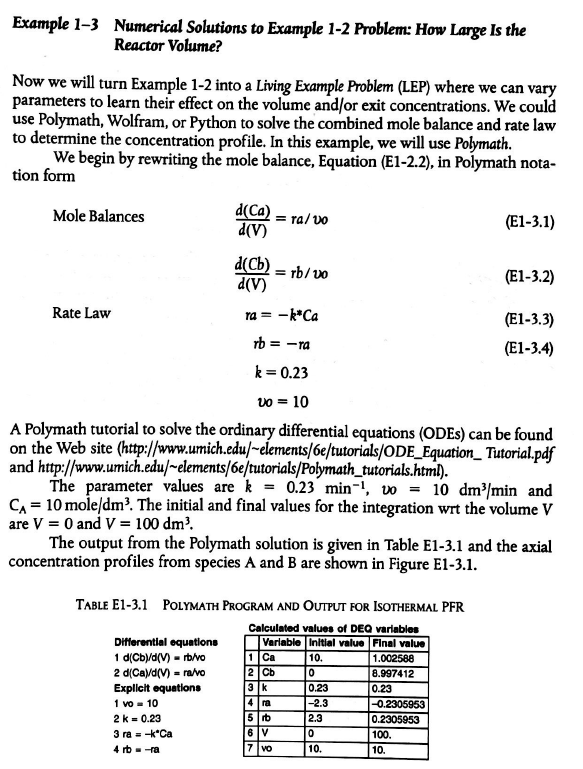

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
#This is in Markdown so it doesn't execute any commands
#dFA/dV=rA #this is mol/L/min
#dFB/dV=-rA
#rA=-k*CA
#CA=FA/flowrate
#flowrate=10L/min
#k=0.23 min^-1
#CA0=10 #mol/L
#V from 0, 100 L

This is written using LaTeX in Markdown display mode<BR>
We will solve using F's instead of C's.  This is the common practice for
complex problems.<BR>
$\frac{dF_A}{dV}=r_A$ #units are mol/L/min <BR>
$\frac{dF_B}{dV}=-r_A$ #units are mol/L/min <BR>
$k=0.23 min^{-1}$<BR>
$\nu_0=10\,\frac{L}{min}$<BR>
$C_A=\frac{F_A}{\nu_0}$<BR>
$r_A=-kC_A$<BR>

$C_{A0}=10$ mol/L<BR>
$F_{A0}=C_{A0}\nu_0=100 \frac{mol}{min}$<BR>
$V$ from 0, 100 L

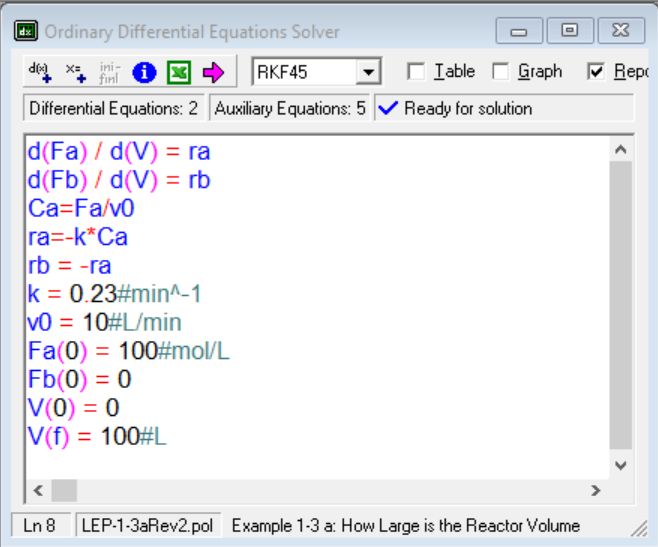

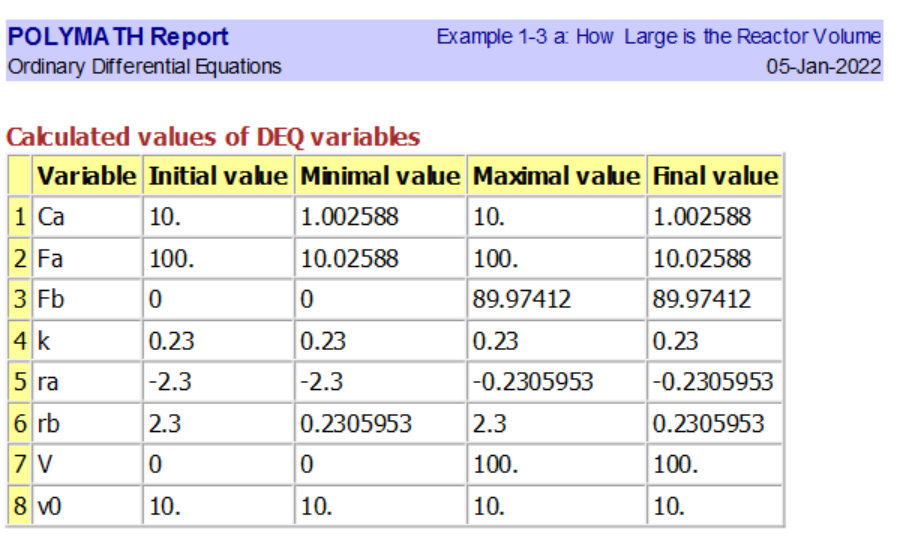

In [5]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
    FA = Yfuncvec[0] 
    FB = Yfuncvec[1]
    flow=10 #l/min
    CA=FA/flow #kmol/m^3
    k=0.23 #1/min
    rA=-k*CA #mol/min/L
    dFAdV = rA #Differential mass balance on acetone 
    dFBdV = -rA #Differential mass balance on acetone
     
    dYfuncvecdV = [dFAdV,dFBdV] 
    return dYfuncvecdV 



In [8]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
F0 = [100,0] # Initial values for the dependent variables FA and FB
sol=ODEfun(0,F0)#Evaluates the derivatives at V=0L
print (sol)

[-2.3000000000000003, 2.3000000000000003]


In [9]:
#Notice that the only outputs from the ODEfun function are the derivatives.
#the following command will give an error since FA, CA, rA etc. are not outputs of the function ODEfun
print(FA,CA,rA)

NameError: name 'FA' is not defined

In [10]:
#test of solve_ivp function (python ODE solver from scipy library)
tspan = (0,100) # Range for the independent variable 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of FA & FB
sol=solve_ivp(ODEfun,tspan,F0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.34778261e-04, 4.78256087e-03, 4.82603870e-02,
       4.83038648e-01, 4.83082126e+00, 3.25312573e+01, 6.89152421e+01,
       1.00000000e+02])
 t_events: None
        y: array([[1.00000000e+02, 9.99990000e+01, 9.99890007e+01, 9.98890627e+01,
        9.88951598e+01, 8.94841306e+01, 4.73232253e+01, 2.05017210e+01,
        1.00309042e+01],
       [0.00000000e+00, 9.99985000e-04, 1.09992850e-02, 1.10937309e-01,
        1.10484020e+00, 1.05158694e+01, 5.26767747e+01, 7.94982790e+01,
        8.99690958e+01]])
 y_events: None


In [17]:
# This prints the values of V.  Notice python uses the generic dy/dt notation for a derivative. 
#The solve_ivp function uses a "variable step size" that it determines based on the complexity of the problem
#The more complex the more steps are needed e.g. smaller step sizes
print(sol.t)

[0.00000000e+00 4.34778261e-04 4.78256087e-03 4.82603870e-02
 4.83038648e-01 4.83082126e+00 3.25312573e+01 6.89152421e+01
 1.00000000e+02]


In [18]:
print(sol.y) # This prints the values for FA and FB.  This is based on dy/dt notation where y0 is FA and 
#y1 is FB FA is the list of numbers in the first set of square brackets [] and 
#FB is in the second set of square brackets []

[[1.00000000e+02 9.99990000e+01 9.99890007e+01 9.98890627e+01
  9.88951598e+01 8.94841306e+01 4.73232253e+01 2.05017210e+01
  1.00309042e+01]
 [0.00000000e+00 9.99985000e-04 1.09992850e-02 1.10937309e-01
  1.10484020e+00 1.05158694e+01 5.26767747e+01 7.94982790e+01
  8.99690958e+01]]


In [19]:
print('prints FA')
print(sol.y[0])
print('prints FB')
print(sol.y[1])

prints FA
[100.          99.99900001  99.98900071  99.88906269  98.8951598
  89.48413056  47.32322529  20.50172096  10.03090418]
prints FB
[0.00000000e+00 9.99985000e-04 1.09992850e-02 1.10937309e-01
 1.10484020e+00 1.05158694e+01 5.26767747e+01 7.94982790e+01
 8.99690958e+01]


In [11]:
numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
X=np.zeros(numrows) #declares and array for conversion that we will print in a table with the F's
print('                     Summary of Results\n')

print('\nSolution ')
print('   V         FA         FB        X  ')
print('  (L)    (mol/min)   (mol/min)      ')
#FA = sol.y[0,row]  from Yfuncvec[0]
#FB = sol.y[1,row] from Yfuncvec[1]
#X=(FA0-FA)/FA0 X is the conversion of A
#CA_anal=CA0exp(-kV/flowrate)
row=0
for row in range(numrows):
    X[row]=(sol.y[0][0]-sol.y[0][row])/sol.y[0][0]#This line defines the conversion at each reactor volume
    print('{:4.4f} {:10.4f} {:10.4f} {:10.4f} '.format(sol.t[row],sol.y[0,row],sol.y[1,row],X[row] ))



                     Summary of Results


Solution 
   V         FA         FB        X  
  (L)    (mol/min)   (mol/min)      
0.0000   100.0000     0.0000     0.0000 
0.0004    99.9990     0.0010     0.0000 
0.0048    99.9890     0.0110     0.0001 
0.0483    99.8891     0.1109     0.0011 
0.4830    98.8952     1.1048     0.0110 
4.8308    89.4841    10.5159     0.1052 
32.5313    47.3232    52.6768     0.5268 
68.9152    20.5017    79.4983     0.7950 
100.0000    10.0309    89.9691     0.8997 


In [21]:
#This cell adds the outputs of CA, CB and X (conversion of A)
numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
X=np.zeros(numrows) #declares and array
CA=np.zeros(numrows)
CB=np.zeros(numrows)
print('                     Summary of Results\n')

print('\nSolution ')
print('  V        FA          FB        X          CA         CB')
print(' (L)   (mol/min)   (mol/min)              (mol/L)    (mol/L)')
#FA = sol.y[0,row]  from Yfuncvec[0] 
#FB = sol.y[1,row] from Yfuncvec[1]
#X=(FA0-FA)/FA0 X is the conversion of A
row=0
for row in range(numrows):
    X[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0] #Notice that sol.y[0,0]=sol.y[0][0]
    CA[row]=sol.y[0,row]/10
    CB[row]=sol.y[1,row]/10
    print('{:4.4f} {:10.2f} {:10.2f} {:10.4f} {:10.4f} {:10.4f}'.format(sol.t[row],sol.y[0,row],
                                                    sol.y[1,row],X[row],CA[row],CB[row]))



                     Summary of Results


Solution 
  V        FA          FB        X          CA         CB
 (L)   (mol/min)   (mol/min)              (mol/L)    (mol/L)
0.0000     100.00       0.00     0.0000    10.0000     0.0000
0.0004     100.00       0.00     0.0000     9.9999     0.0001
0.0048      99.99       0.01     0.0001     9.9989     0.0011
0.0483      99.89       0.11     0.0011     9.9889     0.0111
0.4830      98.90       1.10     0.0110     9.8895     0.1105
4.8308      89.48      10.52     0.1052     8.9484     1.0516
32.5313      47.32      52.68     0.5268     4.7323     5.2677
68.9152      20.50      79.50     0.7950     2.0502     7.9498
100.0000      10.03      89.97     0.8997     1.0031     8.9969


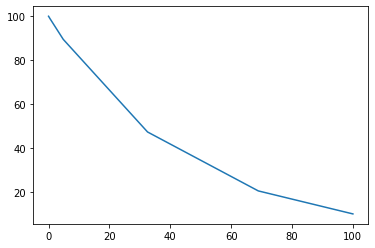

In [12]:
#This is a simple plot
plt.plot(sol.t,sol.y[0])

Text(0, 0.5, 'Molar Flowrate (mol/min)')

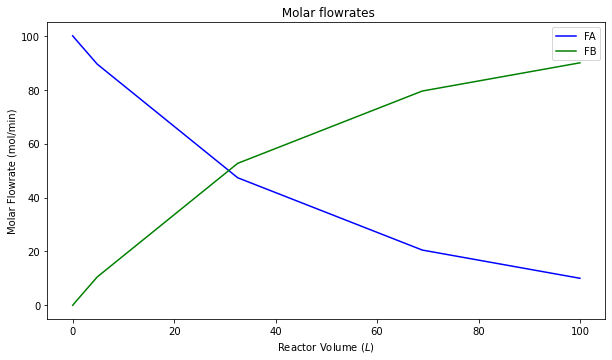

In [13]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
#plt.plot(sol.t,sol.y[2],'r',label='FC')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($L$)')
plt.ylabel('Molar Flowrate (mol/min)')



In [14]:
#The above plot is not very smooth.  If we use more points we will get a better plot.
teval=np.linspace(tspan[0],tspan[1],21)#This will divide the V's into 21 points
print(teval)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


In [15]:
#makes a smoother line by using more values
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])
 t_events: None
        y: array([[100.        ,  97.72624829,  95.50419589,  93.33266774,
         91.21051491,  89.13660979,  87.10966805,  85.

In [16]:
print(tspan)

(0, 100)


Text(0, 0.5, 'Molar Flowrate (kmol/s)')

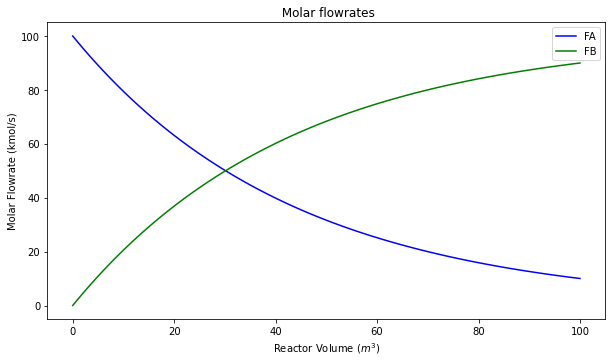

In [17]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')


plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($L$)')
plt.ylabel('Molar Flowrate (mol/min)')



Text(0, 0.5, 'Concentrations ($mol/L$ )')

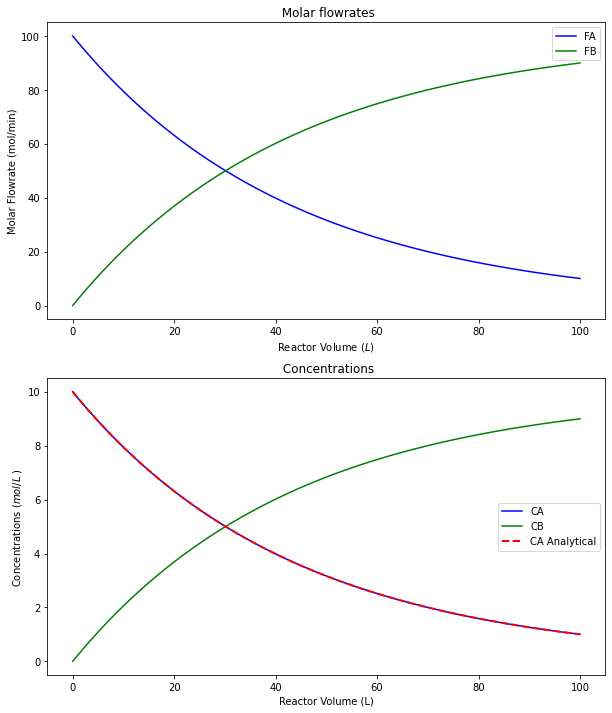

In [18]:
#print plots of both F's and C's
#we need to recalculate the points for CA and CB
numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
X=np.zeros(numrows) #declares and array
CA=np.zeros(numrows)
CB=np.zeros(numrows)

#FA = sol.y[0,row]  from Yfuncvec[0] 
#FB = sol.y[1,row] from Yfuncvec[1]
#X=(FA0-FA)/FA0 X is the conversion of A
row=0
for row in range(numrows):
    X[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0] #Notice that sol.y[0,0]=sol.y[0][0]
    CA[row]=sol.y[0,row]/10
    CB[row]=sol.y[1,row]/10

#plot the data in 2 plots
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($L$)')
plt.ylabel('Molar Flowrate (mol/min)')

plt.subplot (2,1,2)
plt.plot(sol.t,CA,'b',label='CA')
plt.plot(sol.t,CB,'g',label='CB')
plt.plot(sol.t,10*np.exp(-0.23*sol.t/10),'r',label='CA Analytical',linestyle='dashed',linewidth=2)

plt.legend()
plt.title(' Concentrations')
plt.xlabel('Reactor Volume (L)')
plt.ylabel('Concentrations ($mol/L$ )')

In [21]:
#The above plot is not very smooth.  If we use more points we will get a better plot.
teval=np.linspace(tspan[0],tspan[1],21)#This will divide the V's into 21 points
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)
numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
X=np.zeros(numrows) #declares and array
CA=np.zeros(numrows)
CB=np.zeros(numrows)

#FA = sol.y[0,row]  from Yfuncvec[0] 
#FB = sol.y[1,row] from Yfuncvec[1]
#X=(FA0-FA)/FA0 X is the conversion of A
row=0
for row in range(numrows):
    X[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0] #Notice that sol.y[0,0]=sol.y[0][0]
    CA[row]=sol.y[0,row]/10
    CB[row]=sol.y[1,row]/10

In [24]:
#You need to install pandas in your conda prompt
import pandas as pd
# V        FA          FB        X          CA         CB
data = {'V (L)':  sol.t,
        'FA (mol/s)': sol.y[0], 'FB (mol/s)': sol.y[1], 'X':X,'CA (mol/L)': CA, 'CB (mol/L)':CB}

df = pd.DataFrame(data)
pd.set_option('display.precision', 3)
print (df)

    V (L)  FA (mol/s)  FB (mol/s)      X  CA (mol/L)  CB (mol/L)
0     0.0     100.000       0.000  0.000      10.000       0.000
1     5.0      89.137      10.863  0.109       8.914       1.086
2    10.0      79.451      20.549  0.205       7.945       2.055
3    15.0      70.817      29.183  0.292       7.082       2.918
4    20.0      63.124      36.876  0.369       6.312       3.688
5    25.0      56.269      43.731  0.437       5.627       4.373
6    30.0      50.159      49.841  0.498       5.016       4.984
7    35.0      44.710      55.290  0.553       4.471       5.529
8    40.0      39.847      60.153  0.602       3.985       6.015
9    45.0      35.512      64.488  0.645       3.551       6.449
10   50.0      31.652      68.348  0.683       3.165       6.835
11   55.0      28.217      71.783  0.718       2.822       7.178
12   60.0      25.158      74.842  0.748       2.516       7.484
13   65.0      22.431      77.569  0.776       2.243       7.757
14   70.0      19.996    